In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [ ]:
## uni = file name
uni = "vtx"

path = "/users/yewzzang/work/KNO_reconstruction/KNO_pid/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [ ]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

vtx_16f_4h_1000n_7l_mu0_e1
vtx_16f_4h_1000n_7l_mu0_e1_0404
vtx_16f_4h_200n_9l_mu0_e1
vtx_5f_1h_1000n_20l_mu0_e1_0411
vtx_kisti
vtx_time_cut_10f_2h_500n_15l_mu0_e1_0424
vtx_time_cut_64f_2h_200n_2l_mu0_e1_0430
vtx_time_cut_64f_2h_200n_2l_mu0_e1_0430_transfer
vtx_time_cut_64f_8h_500n_8l_mu0_e1_0429
vtx_type1_256f_16h_100n_7l_mu0_e1_0505


In [ ]:
train_list = ['/users/yewzzang/work/KNO_reconstruction/KNO_pid/result/vtx_16f_4h_200n_9l_mu0_e1/train.csv',


 '/users/yewzzang/work/KNO_reconstruction/KNO_pid/result/vtx_type1_256f_16h_100n_7l_mu0_e1_0505/train.csv',
 '/users/yewzzang/work/KNO_reconstruction/KNO_pid/result/vtx_type1_256f_16h_100n_7l_mu0_e1_0505_trans/train.csv',
 '/users/yewzzang/work/KNO_reconstruction/KNO_pid/result/vtx_time_cut_64f_2h_200n_2l_mu0_e1_0430/train.csv'
 
 ]



0 100  /  MTL = 0.1105905  /  MTL epoch = 0078  /  0.0869029  /  ACC = 0.9620290781454132  /  vtx_16f_4h_200n_9l_mu0_e1
1 6  /  MTL = 0.5113168  /  MTL epoch = 0005  /  0.4348741  /  ACC = 0.7758582987098185  /  vtx_type1_256f_16h_100n_7l_mu0_e1_0505
2 13  /  MTL = 0.2439956  /  MTL epoch = 0009  /  0.2208909  /  ACC = 0.9021065675340768  /  vtx_time_cut_64f_2h_200n_2l_mu0_e1_0430


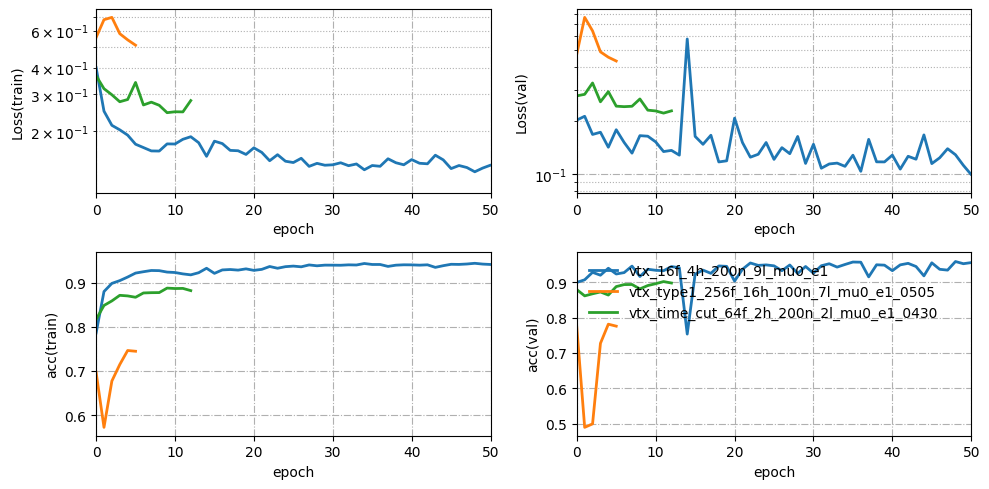

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(2, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(2, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(2, 2, 3, ylabel='acc(train)', xlabel='epoch')
ax4 = plt.subplot(2, 2, 4, ylabel='acc(val)', xlabel='epoch')

for ax in (ax1, ax2,ax3,ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,50])
# ax3.set_ylim(0.9,1.0)
# ax4.set_ylim(0.9,1.0)
lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])

    label = train_list[i]
    l =  ax1.plot(df['loss'], linewidth=2,label=label.split('/')[-2]) 
    ax2.plot(df['val_loss'], linewidth=2,label=label.split('/')[-2])
    ax3.plot(df['acc'], linewidth=2,label=label.split('/')[-2])
    ax4.plot(df['val_acc'], linewidth=2,label=label.split('/')[-2])
    

    print(i,
        len(df['loss']),
        ' / ',
        "MTL = " + f"{df['loss'].min():.7f}",
        " / ",
        "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
        " / ",
        f"{df['val_loss'].min():.7f}",
        " / ",
        "ACC = " + str("{:04}".format(df['val_acc'][np.where(df['val_loss']==df['val_loss'].min())[0][0]])),
        " / ",
        
        label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.legend()
plt.show()
plt.close()

In [ ]:
!pwd

/users/yewzzang/work/KNO_reconstruction/KNO_pid
